# 파이썬 딥러닝

파이썬으로 딥러닝 모델을 만들고 활용하는 방법을 논의합니다.

## 진행


1. 환경설정
1. 필수라이브러리
1. 신경망
1. CNN
1. RNN

In [1]:
print('안녕하세요!')
print('셀 실행은 shift+Enter')

안녕하세요!
셀 실행은 shift+Enter


In [1]:
x = 1

In [2]:
print(x)

1


## 필수 라이브러리

In [3]:
data = list(range(1, 6))
data

[1, 2, 3, 4, 5]

In [4]:
data1 = list(range(6))

In [5]:
data1

[0, 1, 2, 3, 4, 5]

In [7]:
[n*2 for n in data]

[2, 4, 6, 8, 10]

In [8]:
data = [[1,2,3], [4,5,6], [7,8,9]]

In [9]:
import numpy as np

In [10]:
X = np.array(data)

In [11]:
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [23]:
temp1 = np.array([np.nan, np.Inf], np.float16)
temp2 = np.nan_to_num(temp1)
temp2

array([    0., 65500.], dtype=float16)

In [24]:
X * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [26]:
type(X)

numpy.ndarray

In [27]:
X.dtype

dtype('int32')

In [28]:
arr = np.arange(1e7)

In [29]:
len(arr)

10000000

In [33]:
nums = arr.tolist()


In [109]:
%timeit [n*1.1 for n in nums]

955 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
%timeit arr *1.1

45.3 ms ± 4.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [111]:
from datetime import *
sTime = datetime.now()
[n*1.1 for n in nums]
eTime = datetime.now()
print(datetime.now() - sTime)

0:00:01.019627


In [112]:
from datetime import *
sTime = datetime.now()
arr * 1.1
print(datetime.now() - sTime)

0:00:00.055006


In [139]:
%timeit [n * 1.1 for n in arr]

2.66 s ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [140]:
%timeit arr * 1.1

47.1 ms ± 4.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [113]:
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [147]:
X[1:,1:][[1, 0]]

array([[8, 9],
       [5, 6]])

In [114]:
X[0]

array([1, 2, 3])

In [115]:
X[:, 0]

array([1, 4, 7])

In [127]:
X[1:, 1:][[1,0]]

array([[8, 9],
       [5, 6]])

In [134]:
X[1:, 1:][[1,0]]

array([[8, 9],
       [5, 6]])

팬시 색인

In [136]:
X[[0, 2]]

array([[1, 2, 3],
       [7, 8, 9]])

In [137]:
X[[2, 0]]

array([[7, 8, 9],
       [1, 2, 3]])

In [148]:
X[:, [2, 0]]

array([[3, 1],
       [6, 4],
       [9, 7]])

#### 연습

1...16의 숫자를 담은 4x4 행렬을 ndarray로 생성

In [149]:
arr2d = np.arange(1, 17)
arr2d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [150]:
arr2d.ndim

1

In [151]:
len(arr2d)

16

In [152]:
arr2d = arr2d.reshape(4,4)
arr2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [153]:
arr2d.ndim

2

In [154]:
arr2d = arr2d.flatten()

In [155]:
arr2d.ndim

1

In [156]:
arr2d = arr2d.reshape(1, len(arr2d))
arr2d

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]])

In [157]:
arr2d.ndim

2

In [158]:
x = np.array([0, 1, 2, 3, -4, -5])
x

array([ 0,  1,  2,  3, -4, -5])

In [159]:
x > 0

array([False,  True,  True,  True, False, False])

불리언 색인

In [160]:
x[x > 0]

array([1, 2, 3])

In [161]:
x[[True, False, True, False, True, False]]

array([ 0,  2, -4])

원소별 NOT

In [162]:
~(x > 0)

array([ True, False, False, False,  True,  True])

원소별 AND

In [163]:
x[(x > 0) & (x < 3)]

array([1, 2])

원소별 OR

In [164]:
x[(x <0) | (x > 1)]

array([ 2,  3, -4, -5])

In [165]:
arr2d = np.array([[1, -1], [-2, 2]])
arr2d

array([[ 1, -1],
       [-2,  2]])

0보다 작은 값은 모두 0으로 변환

In [166]:
np.where(arr2d < 0, 0, arr2d)

array([[1, 0],
       [0, 2]])

산술 통계

In [167]:
arr = np.random.randn(3, 2)
arr

array([[ 1.2266427 ,  0.54598575],
       [-0.35164969,  0.84247272],
       [ 1.45538753,  0.23104114]])

In [168]:
arr.mean()

0.6583133572187428

In [169]:
arr.mean(axis=0)

array([0.77679351, 0.5398332 ])

In [170]:
arr.mean(axis=1)

array([0.88631422, 0.24541152, 0.84321433])

#### 연습

주어진 배열에서 세 가지 방식으로 합계 내기

In [171]:
arr.sum()

3.9498801433124573

In [172]:
arr.sum(axis=0)

array([2.33038053, 1.61949961])

In [173]:
arr.sum(axis=1)

array([1.77262844, 0.49082303, 1.68642867])

### 선형대수

In [174]:
X = np.array([[1,1], [2, 2]])

In [175]:
Y = np.array([[1, -1], [-1, 1]])

In [176]:
X * Y

array([[ 1, -1],
       [-2,  2]])

In [177]:
np.dot(X, Y)

array([[0, 0],
       [0, 0]])

In [178]:
A = np.array([[3, 6, -5], [1, -3, 2], [5, -1, 4]])
A

array([[ 3,  6, -5],
       [ 1, -3,  2],
       [ 5, -1,  4]])

In [179]:
np.linalg.inv(A)

array([[ 0.15625 ,  0.296875,  0.046875],
       [-0.09375 , -0.578125,  0.171875],
       [-0.21875 , -0.515625,  0.234375]])

In [180]:
b = np.array([12, -2, 10])

In [181]:
x = np.dot(np.linalg.inv(A), b)
x

array([1.75, 1.75, 0.75])

난수

In [182]:
import random

1000개의 난수

In [184]:
nums = [random.randint(0, 10) for _ in range(1000)]
nums


[1,
 9,
 0,
 2,
 9,
 0,
 10,
 6,
 7,
 2,
 1,
 6,
 6,
 8,
 6,
 5,
 0,
 8,
 8,
 7,
 6,
 0,
 1,
 0,
 10,
 2,
 2,
 1,
 7,
 3,
 3,
 0,
 0,
 1,
 2,
 2,
 6,
 5,
 3,
 1,
 8,
 5,
 3,
 6,
 0,
 1,
 9,
 8,
 4,
 8,
 4,
 6,
 3,
 10,
 4,
 4,
 3,
 9,
 9,
 3,
 1,
 0,
 0,
 3,
 10,
 3,
 2,
 1,
 5,
 0,
 7,
 4,
 9,
 5,
 2,
 2,
 4,
 2,
 1,
 5,
 4,
 5,
 9,
 0,
 1,
 4,
 7,
 6,
 10,
 10,
 5,
 0,
 2,
 0,
 6,
 10,
 5,
 1,
 9,
 5,
 8,
 3,
 1,
 5,
 3,
 2,
 7,
 4,
 10,
 8,
 7,
 6,
 4,
 3,
 9,
 3,
 10,
 8,
 6,
 6,
 3,
 4,
 6,
 10,
 1,
 8,
 6,
 5,
 10,
 8,
 0,
 1,
 9,
 4,
 4,
 8,
 8,
 2,
 5,
 5,
 10,
 6,
 0,
 9,
 7,
 10,
 3,
 0,
 2,
 1,
 9,
 5,
 5,
 2,
 3,
 0,
 5,
 7,
 3,
 7,
 10,
 9,
 5,
 10,
 10,
 5,
 6,
 1,
 5,
 10,
 1,
 7,
 9,
 5,
 9,
 10,
 8,
 6,
 10,
 5,
 8,
 10,
 8,
 1,
 7,
 4,
 8,
 10,
 7,
 8,
 5,
 7,
 8,
 10,
 10,
 2,
 9,
 9,
 6,
 4,
 6,
 7,
 7,
 8,
 2,
 8,
 9,
 3,
 10,
 0,
 9,
 9,
 6,
 1,
 7,
 10,
 4,
 5,
 10,
 10,
 3,
 10,
 4,
 1,
 10,
 10,
 8,
 2,
 7,
 0,
 1,
 3,
 0,
 10,
 4,
 3,
 7,
 9,
 9,
 9,
 5,
 9,
 

In [63]:
nums = np.random.randint(0, 11, size=1000)
nums

array([10,  7,  4,  3,  4, 10,  6,  3,  3,  7,  5,  6,  9,  9,  5,  1, 10,
        5,  6, 10,  7,  4, 10,  0,  5,  0, 10,  6,  1,  8,  4,  0,  7,  4,
        4,  1,  8,  7,  0,  2,  0,  7,  6,  8,  7,  0,  5,  5,  4,  7,  8,
        9, 10,  6,  1,  5,  1,  3,  1,  3,  7,  1,  7,  2,  2,  2,  1,  2,
        3,  5,  0,  0,  4,  6,  0,  1,  4,  8,  8,  4,  5,  6,  1,  4,  4,
        4,  9,  6,  9,  9, 10,  3,  9,  1,  1,  1, 10,  9,  2,  1,  3,  5,
        2,  3,  6,  5,  5,  7,  9,  6,  4,  3,  3,  5,  2,  7,  3,  7,  2,
        7,  3,  5,  5,  6,  1,  7,  0, 10,  4,  5,  7,  5,  6,  2,  5,  4,
        4,  7,  0,  7,  8,  3,  8,  2,  1,  2,  8,  7,  8, 10,  5,  0,  5,
        7,  8, 10,  7,  7,  5,  3, 10,  1,  9,  9,  6,  4,  7,  6,  6,  1,
        6,  3,  7,  4,  3,  5,  5,  5,  3,  4,  6,  0,  9, 10, 10,  7,  3,
        6, 10,  2,  9,  4,  3, 10,  8, 10,  6, 10,  8,  6,  3,  5,  0,  0,
        7,  2,  5,  8,  5,  5,  6,  3,  8,  5,  9,  6,  3,  8,  8,  5,  9,
        7,  4,  8, 10,  1

In [64]:
nums = np.random.randint(0, 11, size=(2, 500))
nums

array([[ 9,  9,  1,  9,  4,  3, 10,  2,  0,  9,  5,  8,  8,  0,  6, 10,
         8,  4,  8,  4,  0,  1, 10,  1, 10,  9,  1,  9,  9,  5,  6,  9,
         8,  7,  2,  5, 10, 10,  3,  8, 10,  1,  5,  0,  2,  7,  7,  5,
         0,  8,  8,  9,  9,  0,  0,  6, 10,  6, 10, 10,  7,  9,  7,  6,
         6,  0, 10,  5,  6,  7,  7,  9,  4,  7,  3,  2,  8,  2,  0,  5,
         6,  8, 10,  7,  7,  1,  3, 10,  4,  5,  1,  5,  9,  2,  3,  1,
         2,  2,  9,  7,  6,  8,  8,  6,  6,  8,  2,  0,  6,  2,  6,  4,
         1,  3,  4,  5,  1,  2,  1,  5,  0,  9, 10,  4,  0,  9,  2,  5,
         7,  5,  0,  9, 10,  3,  7,  3,  0,  8,  3,  9,  8,  5,  3,  9,
         0,  3,  7,  3,  2,  5,  1,  8,  6,  8,  7,  1,  3,  9,  1,  8,
         8,  6,  2,  3,  9,  2,  4, 10,  9,  7,  8,  2,  9,  6, 10,  8,
         5,  5,  5, 10,  4,  4,  3, 10,  5,  0,  6,  4,  4,  9,  4,  3,
         1,  3,  7,  9,  1,  6,  4,  6,  6,  1,  6,  7,  9,  9,  7,  7,
         8,  5,  9,  9,  9,  7,  7,  8,  0,  6,  2,  9,  4,  0, 

확률 모델

In [65]:
np.random.uniform(0, 1, size=(3,2))

array([[0.58132391, 0.04802329],
       [0.8502561 , 0.79196723],
       [0.56802867, 0.35336282]])

In [66]:
np.random.rand(3,2)

array([[0.14207861, 0.62535535],
       [0.68157566, 0.16220585],
       [0.96937972, 0.76120649]])

In [67]:
np.random.normal(0, 1, size=(3,2))

array([[-0.9223055 , -0.47495992],
       [-2.36779396,  0.79301019],
       [ 0.34993183,  0.76984962]])

In [68]:
np.random.randn(3, 2)

array([[ 1.71662664,  0.44406395],
       [ 0.92602351,  0.71677252],
       [-1.5996193 , -0.13281571]])

## 시각화

노트북 그래프 출력 설정

In [185]:
%matplotlib inline

In [188]:
import matplotlib.pyplot as plt

In [189]:
x = np.arange(0, 6, 0.1)

In [190]:
x[:5]

array([0. , 0.1, 0.2, 0.3, 0.4])

In [191]:
y = np.sin(x)

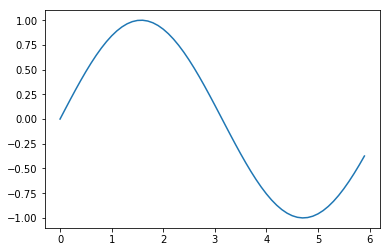

In [192]:
plt.plot(x, y)

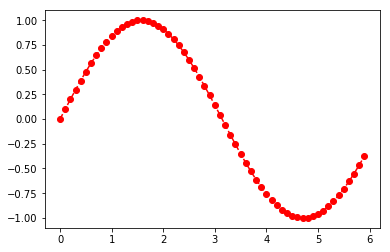

In [193]:
plt.plot(x, y, color='red', marker='o', linestyle='--')

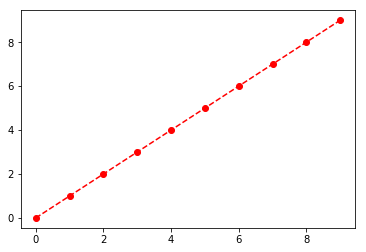

In [194]:
plt.plot(np.arange(10), 'ro--')

두 개 이상의 데이터를 하나의 그래프에서 표현

In [195]:
x = np.arange(10)

In [196]:
y1 = x
y2 = y1[::-1]

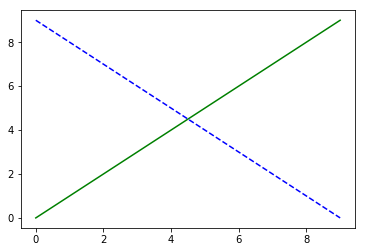

In [197]:
plt.plot(x, y1, 'g')
plt.plot(x, y2, 'b--')

#### 연습

다음 그래프 출력

$$ y = x^2+1 $$

In [200]:
x = np.arange(-5., 5, 0.1)
x.shape

(100,)

In [202]:
y = x**2 + 1

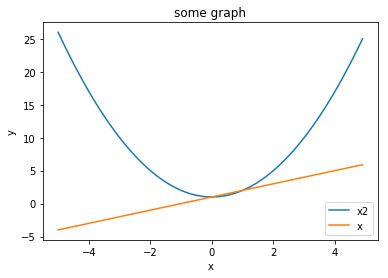

In [203]:
plt.plot(x, y, label='x2')
plt.plot(x, x+1, label='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('some graph')
plt.legend() # 범례 (적당히 괜찮은 곳에 자동으로 표시)

여러 개의 그래프 동시에 그리기

In [204]:
fig = plt.figure()

In [205]:
subplot = fig.add_subplot(1, 1, 1)

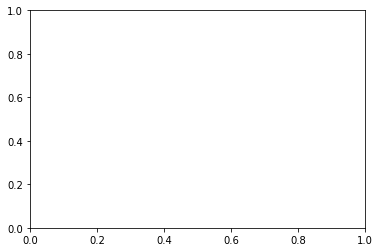

In [85]:
fig

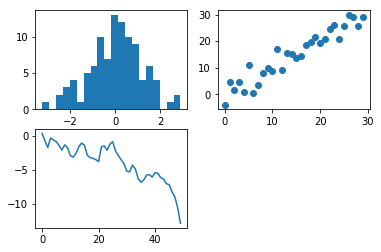

In [86]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100), bins=20)
x = np.arange(30)
y = x + 3 * np.random.randn(30)
ax2.scatter(x, y)
ax3.plot(np.random.randn(50).cumsum())

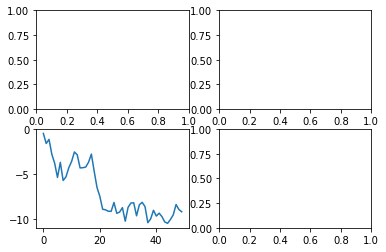

In [214]:
fig, axes = plt.subplots(ncols=2, nrows=2)
axes[1][0].plot(np.random.randn(50).cumsum())



노트북 경로

In [215]:
%pwd

'D:\\python_project\\python_study'

In [216]:
from matplotlib.image import imread

In [217]:
img = imread('data/mozzi.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'data/mozzi.jpg'

In [131]:
type(img)

numpy.ndarray

In [132]:
img.shape

(640, 640, 3)

In [133]:
img.dtype

dtype('uint8')

In [134]:
img.max(), img.min()

(255, 0)

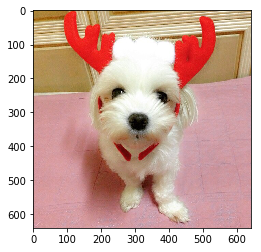

In [135]:
plt.imshow(img)

# SciPy

최적화

In [218]:
def f(x, a, b):
    return a*x + b

In [219]:
x = np.arange(0, 10, 0.1)
np.random.randn(len(x))

array([-1.57848111, -0.08648824, -0.15405123,  0.65671197,  1.6002436 ,
       -0.41342589, -1.20839803,  2.97173691, -0.84311093, -0.12888231,
       -0.92384561,  0.87625216, -0.59474415, -1.70579988,  1.46418158,
        1.27585699,  1.44981154,  0.9593749 ,  0.67690954,  0.95834655,
       -0.05114148,  0.66708582,  0.28323709, -1.05296793,  0.07099782,
       -0.0457873 ,  1.22831127,  0.36411161,  1.10442319, -0.450266  ,
        0.93174184, -0.29224082, -0.85984339, -0.38585659,  0.62139904,
       -0.63018195,  2.43669329,  1.04999479,  2.06983083, -0.76873799,
       -0.93260036,  0.59380298,  0.40806664, -0.19005022,  0.54232802,
       -0.76770576,  0.13096364, -1.20589419, -0.38496392, -0.06165795,
       -0.6016293 ,  1.15810462, -1.64770876,  0.01259154,  1.41190975,
        0.56131396,  0.11076953, -1.13896596, -0.38181411, -0.7838464 ,
       -1.35633163,  0.20528068, -1.4488167 , -3.18602864,  0.49702105,
        0.80691923,  1.14375943, -0.99987201,  0.12052422, -1.36

In [220]:
y = f(x, 1, 2) + np.random.randn(len(x))

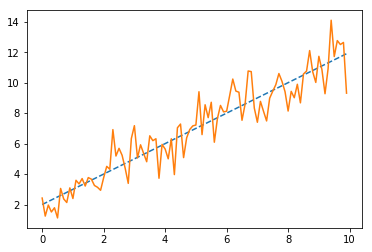

In [221]:
plt.plot(x, f(x, 1, 2), '--')
plt.plot(x, y)

In [222]:
from scipy.optimize import curve_fit

In [223]:
popt, pcov = curve_fit(f, x, y)

In [224]:
a, b = popt
a, b

(0.9972302255460408, 2.037249200354171)

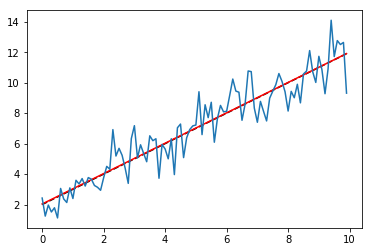

In [225]:
plt.plot(x, f(x, 1, 2), 'k--')
plt.plot(x, f(x, a, b), 'r')
plt.plot(x, y)

## pandas

In [226]:
import pandas as pd

In [227]:
frame = pd.read_csv('data/iris.data', header=None)

In [228]:
type(frame)

pandas.core.frame.DataFrame

In [229]:
frame[:10]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [230]:
frame.values[:10]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa']], dtype=object)

In [231]:
y = frame.values[:, -1]


In [232]:
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [233]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### 연습

처음 4개 열을 선택해서 변수 X로 할당.

In [237]:
X = frame.values[:, 0:4]
X = X.astype('float')



In [238]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [239]:
날씨 = pd.read_excel('data/weather.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'data/weather.xlsx'

In [181]:
날씨[:5]

,location,date,weekDay,avgTemp,highestTemp,lowestTemp,precipitation,snow,windSpeed,humidity,cloud,dayTime,weather
0,seoul,2013-08-01,thur,28.0,32.1,24.5,-,-,1.8,66,7.1,6.0,구름많음
1,seoul,2013-08-02,fri,27.4,29.3,25.2,7.5,-,2.1,79,9.1,0.9,흐림/안개/비
2,seoul,2013-08-03,sat,28.9,32.6,26.7,0.1,-,3.6,72,8.1,8.9,흐림/소나기
3,seoul,2013-08-04,sun,28.3,31.3,26.4,4.5,-,2.5,76,8.0,4.7,흐림/소나기/안개
4,seoul,2013-08-05,mon,27.7,30.1,26.4,7,-,3.3,78,7.0,4.5,구름많음/안개/천둥번개/비


In [184]:
location = 날씨['location']

In [186]:
type(location)

pandas.core.series.Series

In [187]:
location[:5]

0    seoul
1    seoul
2    seoul
3    seoul
4    seoul
Name: location, dtype: object

In [185]:
np.unique(location)

array(['seoul', 'suwon'], dtype=object)

In [188]:
location.value_counts()

seoul    730
suwon    730
Name: location, dtype: int64

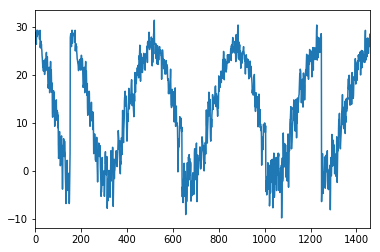

In [190]:
날씨['avgTemp'].plot()

In [195]:
제약업종 = pd.read_clipboard()

In [196]:
제약업종[:5]

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실
0,삼일제약,"50,000","11,500",+29.87%,"50,000",0,"1,591,878","72,853","617,213",토론실
1,바이넥스 *,"16,450","상승 3,000",+22.30%,"16,400","16,450","10,509,325","164,091","1,001,320",토론실
2,부광약품,"29,450","상승 2,650",+9.89%,"29,400","29,450","1,614,566","45,798","353,580",토론실
3,KPX생명과학 *,"9,030",상승 760,+9.19%,"9,020","9,030","6,997,158","62,306","727,440",토론실
4,대성미생물 *,"238,400","상승 19,600",+8.96%,"238,200","238,400","20,810","4,909","3,539",토론실


## 기계학습 리뷰

In [131]:
iris = pd.read_csv('data/iris.data', header=None)

In [132]:
iris[:5]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
y = iris[4]

In [138]:
y.value_counts()


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: 4, dtype: int64

In [139]:
X = iris.values[:, 0:4].astype('float32')

In [140]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]], dtype=float32)

In [141]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [179]:
len(X_train), len(X_test)

(120, 30)

데이터 살펴보기

In [180]:
c = y.replace(np.unique(y), ['r', 'g', 'b'])

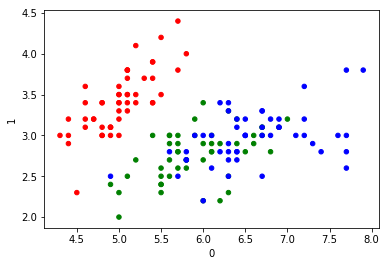

In [181]:
pd.DataFrame(X).plot(kind='scatter', x=0, y=1, c=c)

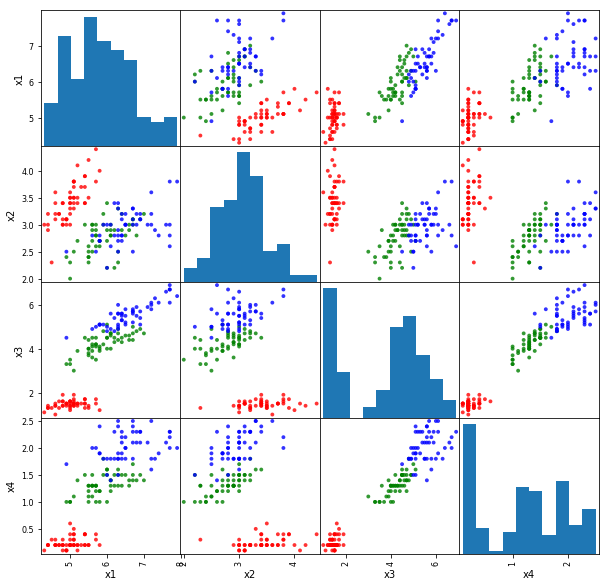

In [182]:
_ = pd.plotting.scatter_matrix(
    pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4']), c=c, 
    figsize=(10, 10), # Figure 크기
    s=60, # 산포도 점 크기
    alpha=0.8 # 산포도 점 투명도
)

In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
knn_1 = KNeighborsClassifier(n_neighbors=1)

In [184]:
knn_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [185]:
y_pred = knn_1.predict(X_test)

In [186]:
y_pred[:5]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [187]:
np.mean(y_pred == y_test)

0.9

In [188]:
knn_1.score(X_test, y_test)

0.9

In [189]:
knn_1.score(X_train, y_train)

1.0

이웃의 개수에 따른 모델의 성능 평가

In [192]:
results = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    results.append((train_score, test_score))

In [193]:
훈련평가 = pd.DataFrame(results, columns=['train', 'test'])

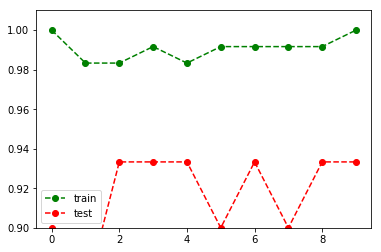

In [195]:
훈련평가.plot(ylim=(0.9, 1.01), style=['go--', 'ro--'])